In [1]:
url= 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'


In [3]:
url.split("/")[-1]

'housing.tgz'

In [4]:
import os

In [5]:
os.path.basename(url)

'housing.tgz'

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data (housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [3]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\housing\\housing.csv'

## Data Ingestion Explanation

In [1]:
import pandas as pd

import pandas as pd

In [5]:
housing_data_frame=pd.read_csv(r"C:\Users\pkana\Machine_Learning_Projects\housing\artifact\data_ingestion\2022-09-27-14-20-17\raw_data\housing.csv")

In [6]:
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 54.9/54.9 kB 720.1 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 960.0/960.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

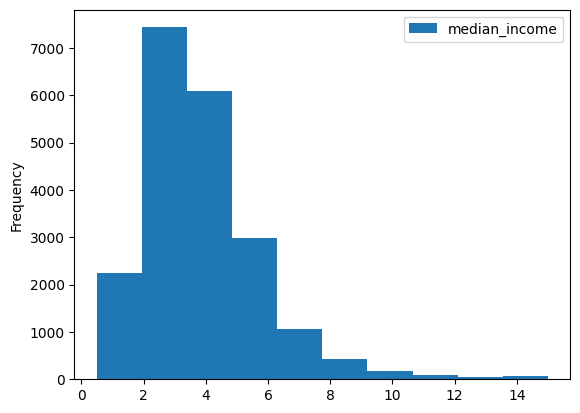

In [10]:
housing_data_frame[["median_income"]].plot(kind="hist")

In [11]:
import numpy as np

In [13]:
housing_data_frame['income_cat']=pd.cut(housing_data_frame['median_income'],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5])

In [14]:
housing_data_frame['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [15]:
housing_data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [29]:
housing_data_frame['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

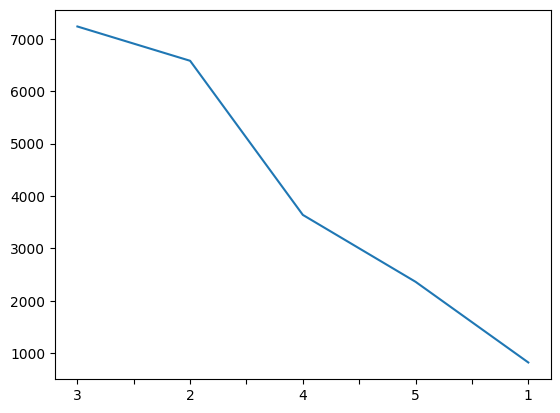

In [28]:
housing_data_frame['income_cat'].value_counts().plot()

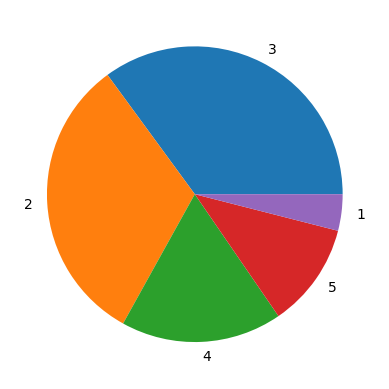

In [33]:
plt.pie(housing_data_frame['income_cat'].value_counts(),labels=housing_data_frame['income_cat'].value_counts().index)
plt.show()

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

In [35]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [37]:
for train_ix,test_ix in split.split(housing_data_frame,housing_data_frame["income_cat"]):
    print(train_ix,test_ix)

[12655 15502  2908 ... 19263 19140 19773] [ 5241 17352  3505 ... 17223 10786  3965]


In [38]:
train_ix

array([12655, 15502,  2908, ..., 19263, 19140, 19773], dtype=int64)

In [40]:
train_df=housing_data_frame.iloc[train_ix]

In [41]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [44]:
housing_data_frame.shape

(20640, 11)

In [43]:
train_df.shape

(16512, 11)

In [45]:
16512/20640

0.8

In [47]:
test_df=housing_data_frame.loc[test_ix]

In [48]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [49]:
test_df.shape

(4128, 11)

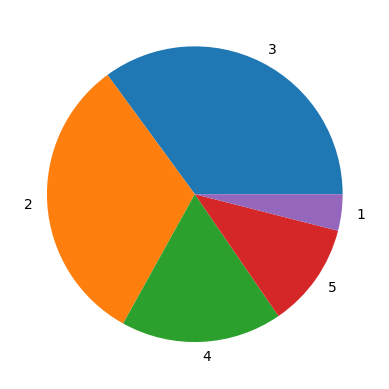

In [53]:
plt.pie(train_df['income_cat'].value_counts(),labels=train_df['income_cat'].value_counts().index)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X=housing_data_frame.drop('income_cat',axis=1)

In [56]:
y=housing_data_frame['income_cat']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

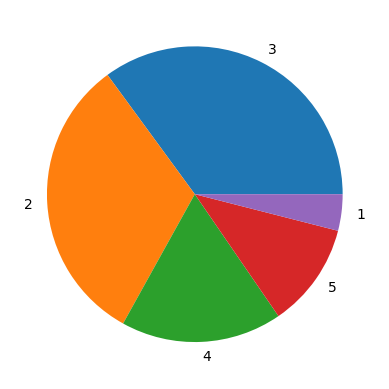

In [65]:
plt.pie(y.value_counts(),labels=y.value_counts().index);

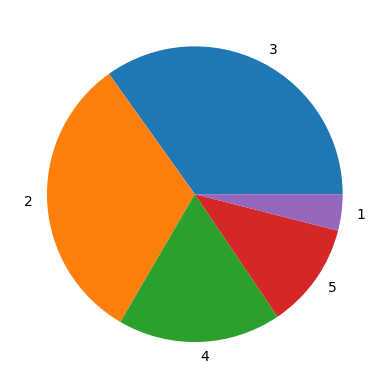

In [66]:
plt.pie(y_train.value_counts(),labels=y_train.value_counts().index);

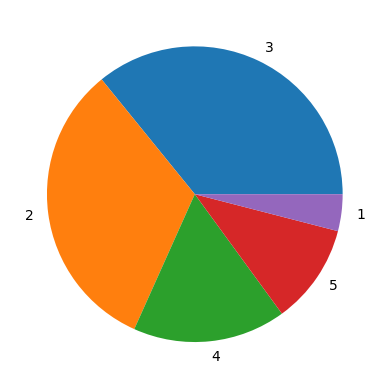

In [67]:
plt.pie(y_test.value_counts(),labels=y_test.value_counts().index);

##  Creating Schema for dataframe

In [76]:
data_type=list(map (lambda x: str(x).replace("dtype('","").replace("')",""),housing_data_frame.dtypes.values))

In [77]:
column=housing_data_frame.columns

In [78]:
dict(zip(column,data_type))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}